## Business Demand

• Average tip received by a vendor during the day </br>
• Which time of the day is the busiest? </br>
• Clean the Data and fix any anomalies </br>
• Classify trips based on Payment Type (not the number in the excel sheet but the actual payment type. Use metadata table for
reference) </br>
• Is there any relationship between congestion surcharge and trip distance? </br>
• The outcome needs to be in the form of a report/dashboard/presentation in a visualisation tool of your choice. </br>
• Use Python </br>

## Process

- data wrangling / cleaning / transformation
- exploratory data analysis
- insights by visualisation / dashboard


## Raw Data

- yellow_tripdata_2021-01_raw_updated.csv
- surcharge_data.json

Look up data:

- VendorID:  A code indicating the TPEP provider that provided the record.
1= Creative Mobile Technologies, LLC (CMT); 2= VeriFone Inc (Verifone), 3,4,5 = Other

- RatecodeID: The final rate code in effect at the end of the trip.
1= Standard rate
2=JFK
3=Newark
4=Nassau or Westchester
5=Negotiated fare
6=Group ride

- Payment_type: A numeric code signifying how the passenger paid for the trip.
1= Credit card
2= Cash
3= No charge
4= Dispute
5= Unknown
6= Voided trip

## Load library

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

## Convert JSON file (surcharge_data.json) to CSV file

In [33]:
# Load the JSON data from the file
with open('raw_data\surcharge_data.json', 'r') as file:
    data = json.load(file)

# Create a list to store the data
surcharge_data = []

# Iterate through the JSON data and extract the required fields
for tripid, details in data.items():
    surcharge_data.append({
        'tripid': tripid,
        'improvement_surcharge': details['improvement_surcharge'],
        'congestion_surcharge': details['congestion_surcharge']
    })

# Create a DataFrame from the list
df_temp = pd.DataFrame(surcharge_data)

# Export the DataFrame to a CSV file
df_temp.to_csv('raw_data\surcharge_dataset.csv', index=False)

print("CSV file exported successfully.")

CSV file exported successfully.


## Load trip data

In [34]:
with open(r'raw_data\yellow_tripdata_2021-01_raw_updated.csv', 'r')as file:
    trip = pd.read_csv(file)
    
df_trip = trip.copy()
df_trip.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,tripId
0,1.0,2021-01-01 00:30:10,2021-01-01 00:36:12,1.0,2.1,1.0,N,142,43,2.0,8.0,3.0,0.5,0.00,0.0,559893529209
1,1.0,2021-01-01 00:51:20,2021-01-01 00:52:19,1.0,0.2,1.0,N,238,151,2.0,3.0,0.5,0.5,0.00,0.0,993405808080
2,1.0,2021-01-01 00:43:30,2021-01-01 01:11:06,1.0,14.7,1.0,N,132,165,1.0,42.0,0.5,0.5,8.65,0.0,267031741304
3,1.0,2021-01-01 00:15:48,2021-01-01 00:31:01,0.0,10.6,1.0,N,138,132,1.0,29.0,0.5,0.5,6.05,0.0,355132875433
4,2.0,2021-01-01 00:31:49,2021-01-01 00:48:21,1.0,4.94,1.0,N,68,33,1.0,16.5,0.5,0.5,4.06,0.0,603494714228


## Load surcharge data

In [35]:
with open(r'raw_data\surcharge_dataset.csv', 'r')as file:
    surcharge = pd.read_csv(file)
    
df_surcharge = surcharge.copy()
df_surcharge.head()

,tripid,improvement_surcharge,congestion_surcharge
0,559893529209,0.3,2.5
1,993405808080,0.3,0.0
2,267031741304,0.3,0.0
3,355132875433,0.3,0.0
4,603494714228,0.3,2.5


## Merge Surcharge and Trip data by tripid

In [36]:
# Merge the DataFrames on the 'tripId' column
df = pd.merge(df_trip, df_surcharge, left_on='tripId', right_on='tripid', how="left")
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,tripId,tripid,improvement_surcharge,congestion_surcharge
0,1.0,2021-01-01 00:30:10,2021-01-01 00:36:12,1.0,2.1,1.0,N,142,43,2.0,8.0,3.0,0.5,0.00,0.0,559893529209,559893529209,0.3,2.5
1,1.0,2021-01-01 00:51:20,2021-01-01 00:52:19,1.0,0.2,1.0,N,238,151,2.0,3.0,0.5,0.5,0.00,0.0,993405808080,993405808080,0.3,0.0
2,1.0,2021-01-01 00:43:30,2021-01-01 01:11:06,1.0,14.7,1.0,N,132,165,1.0,42.0,0.5,0.5,8.65,0.0,267031741304,267031741304,0.3,0.0
3,1.0,2021-01-01 00:15:48,2021-01-01 00:31:01,0.0,10.6,1.0,N,138,132,1.0,29.0,0.5,0.5,6.05,0.0,355132875433,355132875433,0.3,0.0
4,2.0,2021-01-01 00:31:49,2021-01-01 00:48:21,1.0,4.94,1.0,N,68,33,1.0,16.5,0.5,0.5,4.06,0.0,603494714228,603494714228,0.3,2.5


# Data Preparation

## Drop unecessary columns

In [37]:
# drop duplicated tripid field
df.drop(columns=['tripid'], inplace=True)

# Drop the unecessary columns from the DataFrame
columns_to_drop = ['passenger_count', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'extra', 
                   'mta_tax', 'tolls_amount', 'improvement_surcharge', 'tolls_amount']

df.drop(columns=columns_to_drop, inplace=True)


In [38]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,RatecodeID,payment_type,fare_amount,tip_amount,tripId,congestion_surcharge
0,1.0,2021-01-01 00:30:10,2021-01-01 00:36:12,2.1,1.0,2.0,8.0,0.00,559893529209,2.5
1,1.0,2021-01-01 00:51:20,2021-01-01 00:52:19,0.2,1.0,2.0,3.0,0.00,993405808080,0.0
2,1.0,2021-01-01 00:43:30,2021-01-01 01:11:06,14.7,1.0,1.0,42.0,8.65,267031741304,0.0
3,1.0,2021-01-01 00:15:48,2021-01-01 00:31:01,10.6,1.0,1.0,29.0,6.05,355132875433,0.0
4,2.0,2021-01-01 00:31:49,2021-01-01 00:48:21,4.94,1.0,1.0,16.5,4.06,603494714228,2.5


## Dataframe Overview

Check null values, missing values, negative values, zero value or duplicated values and the number of distinct (unique) values for each columns with the unique sample values.
This gives a good insight into the dataframe to plan the data cleaning.

In [94]:
# Check the data quality again
pd.DataFrame({
    'column': df.columns.values,
    'data_type': df.dtypes.values,
    'null_value(%)': df.isna().mean().values * 100,
    'negative_value(%)': [len(df[col][df[col] < 0]) / len(df) * 100 if col in df.select_dtypes(include=[np.number]).columns else 0 for col in df.columns],
    'duplicates' : df.duplicated().sum(),
    'unique': df.nunique().values,
    'values': [df[col].unique() for col in df.columns]}
).round(2)

,column,data_type,null_value(%),negative_value(%),duplicates,unique,values
0,VendorID,int32,0.0,0.0,0,5,"[1, 2, 5, 4, 3]"
1,tpep_pickup_datetime,object,0.0,0.0,0,939018,"[2021-01-01 00:30:10, 2021-01-01 00:51:20, 202..."
2,tpep_dropoff_datetime,object,0.0,0.0,0,935990,"[2021-01-01 00:36:12, 2021-01-01 00:52:19, 202..."
3,trip_distance,float64,0.0,0.0,0,3787,"[2.1, 0.2, 14.7, 10.6, 4.94, 1.6, 4.1, 5.7, 9...."
4,RatecodeID,int32,0.0,0.0,0,6,"[1, 2, 4, 5, 3, 6]"
5,payment_type,int32,0.0,0.0,0,6,"[2, 1, 4, 3, 5, 6]"
6,fare_amount,float64,0.0,0.0,0,5843,"[8.0, 3.0, 42.0, 29.0, 16.5, 16.0, 18.0, 27.5,..."
7,tip_amount,float64,0.0,0.0,0,2155,"[0.0, 8.65, 6.05, 4.06, 2.35, 3.15, 2.49, 2.36..."
8,tripId,int64,0.0,0.0,0,1369765,"[559893529209, 993405808080, 267031741304, 355..."
9,congestion_surcharge,float64,0.0,0.0,0,4,"[2.5, 0.0, 0.75, 3.0]"


Note:  </br>
    1. RatecodeID column has some <b>null/nan values</b> --> Replace with appropriate values? Remove?  </br>
    2. fare_amount and congestion_surcharge column has some <b>negative values</b> --> Replace with appropriate values? Remove?  </br>
    3. VendorID, RatecodeID, payment_type columns are <b>float64 type</b>. --> change to Int?  </br>
    4. RatecodeID columns has value of 99.0 which is not normal.
       

## Null values

In [45]:
print("Number of missing values per column:")
print(df.isna().sum())
# print(df.isnull().sum())

Number of missing values per column:
VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
trip_distance                0
RatecodeID               98352
payment_type                 0
fare_amount                  0
tip_amount                   0
tripId                       0
congestion_surcharge         0
dtype: int64


In [50]:
df['RatecodeID'].value_counts()

1.0     1249239
2.0       14858
5.0        5212
4.0        1202
3.0         856
99.0         36
6.0          10
Name: RatecodeID, dtype: int64

The values of RatecodeID should be:  </br>
1= Standard rate </br>
2=JFK </br>
3=Newark </br>
4=Nassau or Westchester </br>
5=Negotiated fare </br>
6=Group ride </br>

However, the RatecodeID columns in the current dataset includes: </br>
- unexpected value (99.0), 29 occurrence
- null values, 98352 occrrence  

### Deal with null values

1. Drop data
2. Replace data (by mean, frequency, other factors)

Based on the values distribution, we replace the 99.0 and null values with 1.

In [51]:
# replace 99.0 with 1
df['RatecodeID'] = df['RatecodeID'].replace(99.0, 1)
df['RatecodeID'].value_counts()

1.0    1249275
2.0      14858
5.0       5212
4.0       1202
3.0        856
6.0         10
Name: RatecodeID, dtype: int64

In [53]:
# replace null with 1
df['RatecodeID'].fillna(1, inplace=True)

# check again the null values
print(df.isna().sum())

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
trip_distance            0
RatecodeID               0
payment_type             0
fare_amount              0
tip_amount               0
tripId                   0
congestion_surcharge     0
dtype: int64


In [61]:
# check the record count of value 1
# before: 1249275
# null replaced: 98352
# after: 1347627 (= 1249275 + 98352)
df['RatecodeID'].value_counts()

1.0    1347627
2.0      14858
5.0       5212
4.0       1202
3.0        856
6.0         10
Name: RatecodeID, dtype: int64

## Negative values??

fare_amount and congestion_surcharge contains negative values.

convert the values to positive.


In [73]:
(df['fare_amount'] < 0).sum()

6769

In [74]:
(df['congestion_surcharge'] < 0).sum()

5497

In [75]:
# Convert the negative values to positive
df['fare_amount'] = df['fare_amount'].abs()
df['congestion_surcharge'] = df['congestion_surcharge'].abs()

# check the negative values again
print((df['fare_amount'] < 0).sum())
print((df['congestion_surcharge'] < 0).sum())

0
0


## Data type

- Convert these columns to integer: VendorID, RatecodeID, payment_type.
- Convert these columns to float64: trip_distance.
- These columns maybe used for join to their look up tables later.

In [77]:
print(df.dtypes)

VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
trip_distance             object
RatecodeID               float64
payment_type             float64
fare_amount              float64
tip_amount               float64
tripId                     int64
congestion_surcharge     float64
dtype: object


In [79]:
# Convert 'VendorID' column from float to integer
df['VendorID'] = df['VendorID'].astype(int)
df['RatecodeID'] = df['RatecodeID'].astype(int)
df['payment_type'] = df['payment_type'].astype(int)

print(df.dtypes)

VendorID                   int32
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
trip_distance             object
RatecodeID                 int32
payment_type               int32
fare_amount              float64
tip_amount               float64
tripId                     int64
congestion_surcharge     float64
dtype: object


In [ ]:
df['trip_distance'] = df['trip_distance'].astype('float64')
print(df.dtypes)


### ValueError: could not convert string to float: '20.26km' 

- trip_distance columns contains inconsistent data such as 20.26km. We can remove the string 'km'.

In [ ]:
# remove the distance unit 'km' from the value, then convert to float
df['trip_distance'] = df['trip_distance'].str.replace('km', '').astype(float)

In [130]:
# Convert date value column from Object to datetime data type
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
print(df.dtypes)

VendorID                         object
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
trip_distance                   float64
RatecodeID                       object
payment_type                     object
fare_amount                     float64
tip_amount                      float64
tripId                            int64
congestion_surcharge            float64
dtype: object


In [131]:
print(df.dtypes)

VendorID                         object
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
trip_distance                   float64
RatecodeID                       object
payment_type                     object
fare_amount                     float64
tip_amount                      float64
tripId                            int64
congestion_surcharge            float64
dtype: object


In [124]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,RatecodeID,payment_type,fare_amount,tip_amount,tripId,congestion_surcharge
0,CMT,2021-01-01 00:30:10,2021-01-01 00:36:12,2.10,Standard rate,Cash,8.0,0.00,559893529209,2.5
1,CMT,2021-01-01 00:51:20,2021-01-01 00:52:19,0.20,Standard rate,Cash,3.0,0.00,993405808080,0.0
2,CMT,2021-01-01 00:43:30,2021-01-01 01:11:06,14.70,Standard rate,Credit card,42.0,8.65,267031741304,0.0
3,CMT,2021-01-01 00:15:48,2021-01-01 00:31:01,10.60,Standard rate,Credit card,29.0,6.05,355132875433,0.0
4,Verifone,2021-01-01 00:31:49,2021-01-01 00:48:21,4.94,Standard rate,Credit card,16.5,4.06,603494714228,2.5


In [93]:
# Check the data quality again
pd.DataFrame({
    'column': df.columns.values,
    'data_type': df.dtypes.values,
    'null_value(%)': df.isna().mean().values * 100,
    'negative_value(%)': [len(df[col][df[col] < 0]) / len(df) * 100 if col in df.select_dtypes(include=[np.number]).columns else 0 for col in df.columns],
    'duplicates' : df.duplicated().sum(),
    'unique': df.nunique().values,
    'values': [df[col].unique() for col in df.columns]}
).round(2)

,column,data_type,null_value(%),negative_value(%),duplicates,unique,values
0,VendorID,int32,0.0,0.0,0,5,"[1, 2, 5, 4, 3]"
1,tpep_pickup_datetime,object,0.0,0.0,0,939018,"[2021-01-01 00:30:10, 2021-01-01 00:51:20, 202..."
2,tpep_dropoff_datetime,object,0.0,0.0,0,935990,"[2021-01-01 00:36:12, 2021-01-01 00:52:19, 202..."
3,trip_distance,float64,0.0,0.0,0,3787,"[2.1, 0.2, 14.7, 10.6, 4.94, 1.6, 4.1, 5.7, 9...."
4,RatecodeID,int32,0.0,0.0,0,6,"[1, 2, 4, 5, 3, 6]"
5,payment_type,int32,0.0,0.0,0,6,"[2, 1, 4, 3, 5, 6]"
6,fare_amount,float64,0.0,0.0,0,5843,"[8.0, 3.0, 42.0, 29.0, 16.5, 16.0, 18.0, 27.5,..."
7,tip_amount,float64,0.0,0.0,0,2155,"[0.0, 8.65, 6.05, 4.06, 2.35, 3.15, 2.49, 2.36..."
8,tripId,int64,0.0,0.0,0,1369765,"[559893529209, 993405808080, 267031741304, 355..."
9,congestion_surcharge,float64,0.0,0.0,0,4,"[2.5, 0.0, 0.75, 3.0]"


# Fill look up values for VendorId, RatecodeID, Payment_type

In [100]:
df["VendorID"].value_counts()

2    860651
1    410762
5     33062
3     32689
4     32601
Name: VendorID, dtype: int64

In [102]:
# Define the mapping dictionary
vendor_mapping = {1: 'CMT', 2: 'Verifone', 3: 'Other', 4: 'Other', 5: 'Other'}

# Update the 'VendorId' column with the corresponding values
df['VendorID'] = df['VendorID'].replace(vendor_mapping)

df["VendorID"].value_counts()

Verifone    860651
CMT         410762
Other        98352
Name: VendorID, dtype: int64

In [106]:
df["RatecodeID"].value_counts()

1    1347627
2      14858
5       5212
4       1202
3        856
6         10
Name: RatecodeID, dtype: int64

In [107]:
ratecode_mapping = {
    1:'Standard rate',
    2:'JFK',
    3:'Newark',
    4:'Nassau or Westchester',
    5:'Negotiated fare',
    6:'Group ride'    
}
df['RatecodeID'] = df['RatecodeID'].replace(ratecode_mapping)
df["RatecodeID"].value_counts()

Standard rate            1347627
JFK                        14858
Negotiated fare             5212
Nassau or Westchester       1202
Newark                       856
Group ride                    10
Name: RatecodeID, dtype: int64

In [110]:
df['payment_type'].value_counts()

1    934473
2    322889
5     49238
6     49114
3      8384
4      5667
Name: payment_type, dtype: int64

In [111]:
payment_type_mapping = {
    1:'Credit card',
    2:'Cash',
    3:'No charge',
    4:'Dispute',
    5:'Unknown',
    6:'Voided trip'    
}
df['payment_type'] = df['payment_type'].replace(payment_type_mapping)
df["payment_type"].value_counts()

Credit card    934473
Cash           322889
Unknown         49238
Voided trip     49114
No charge        8384
Dispute          5667
Name: payment_type, dtype: int64

In [112]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,RatecodeID,payment_type,fare_amount,tip_amount,tripId,congestion_surcharge
0,CMT,2021-01-01 00:30:10,2021-01-01 00:36:12,2.10,Standard rate,Cash,8.00,0.00,559893529209,2.5
1,CMT,2021-01-01 00:51:20,2021-01-01 00:52:19,0.20,Standard rate,Cash,3.00,0.00,993405808080,0.0
2,CMT,2021-01-01 00:43:30,2021-01-01 01:11:06,14.70,Standard rate,Credit card,42.00,8.65,267031741304,0.0
3,CMT,2021-01-01 00:15:48,2021-01-01 00:31:01,10.60,Standard rate,Credit card,29.00,6.05,355132875433,0.0
4,Verifone,2021-01-01 00:31:49,2021-01-01 00:48:21,4.94,Standard rate,Credit card,16.50,4.06,603494714228,2.5
...,...,...,...,...,...,...,...,...,...,...
1369760,Other,2021-01-25 08:32:04,2021-01-25 08:49:32,8.80,Standard rate,Voided trip,21.84,0.00,204125243754,0.0
1369761,Other,2021-01-25 08:34:00,2021-01-25 09:04:00,5.86,Standard rate,Voided trip,26.67,0.00,511527970247,0.0
1369762,Other,2021-01-25 08:37:00,2021-01-25 08:53:00,4.45,Standard rate,Unknown,25.29,0.00,795487851532,0.0
1369763,Other,2021-01-25 08:28:00,2021-01-25 08:50:00,10.04,Standard rate,Unknown,28.24,0.00,550977006601,0.0


In [132]:
# Export the merged and cleaned DataFrame to a new CSV file
df.to_csv('nyc_taxi_trip_cleaned_final.csv', index=False)
print("CSV file exported successfully.")

CSV file exported successfully.


# Exploratory Data Analysis

In [114]:
#df.corr()
df[['trip_distance','fare_amount','tip_amount','congestion_surcharge']].corr()

,trip_distance,fare_amount,tip_amount,congestion_surcharge
trip_distance,1.000000,0.013500,0.002810,-0.013495
fare_amount,0.013500,1.000000,0.397750,-0.363537
tip_amount,0.002810,0.397750,1.000000,0.044309
congestion_surcharge,-0.013495,-0.363537,0.044309,1.000000


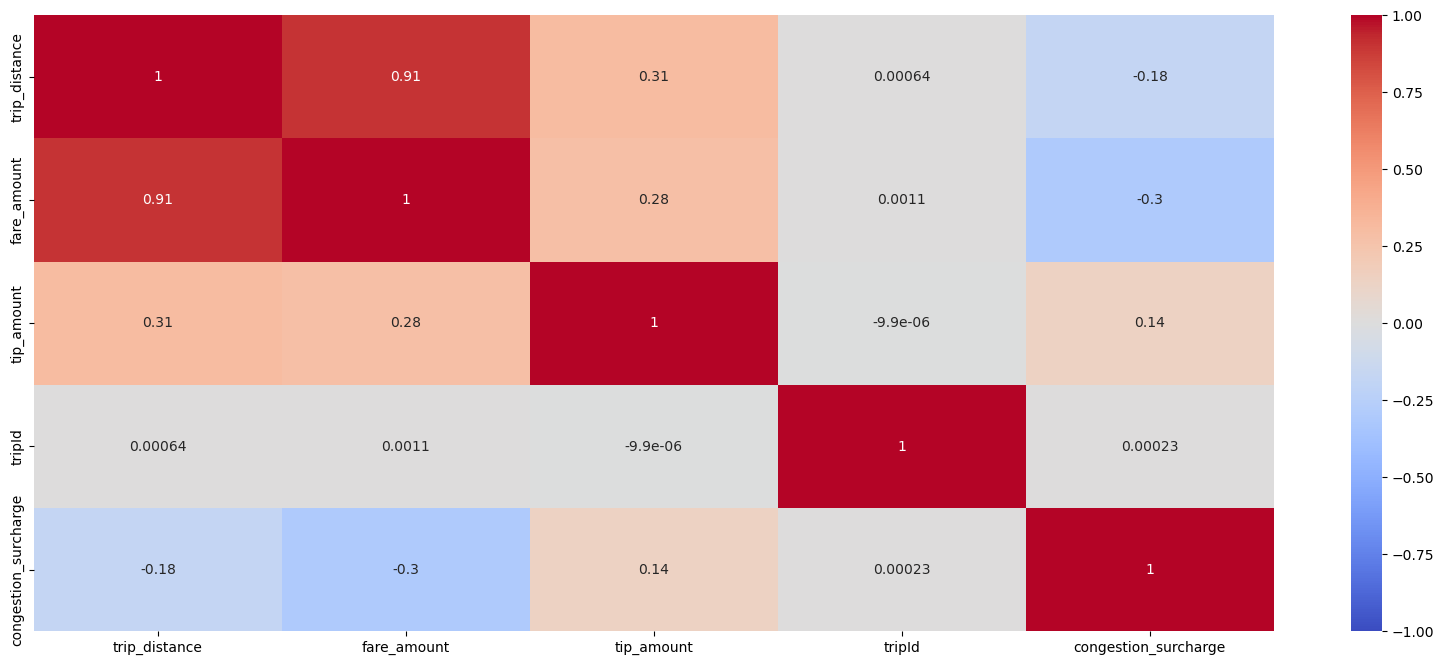

In [116]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr('spearman'), vmin=-1, vmax=1, annot=True, cmap="coolwarm")
plt.show()

- Strong correlation between trip_distance and fare_amount.
- No other significant relations is found.